## Final Project
### In order to solve this set of questions you will use the dataset in the relative directory ./tmdb_5000_movies.csv


In [24]:
import json 
import pandas as pd
import numpy as np

import matplotlib.pyplot  as plt

import seaborn as sns 

### Open Your CSV file and print the first 10 rows in a good format ###

In [25]:
data = pd.read_csv("tmdb_5000_movies.csv",index_col=0)
df = pd.DataFrame(data)

df.head(10)

,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
budget,,,,,,,,,,,,,,,,,,,
237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/1/2007,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11/24/2010,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_

In [26]:
#df['release_date'] = pd.to_datetime(data['release_date'], format='%m/%d/%y', errors='coerce')
df['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
df


,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
budget,,,,,,,,,,,,,,,,,,,
237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958

##### Exploring data

In [27]:
df.dtypes


genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

### Check if any NANs in your dataset and fill them with a good filer ###

In [28]:
print(df.isnull().sum())
data["homepage"].fillna("un konwen url", inplace = True)
data["overview"].fillna("no over veiw", inplace = True)
data["tagline"].fillna("no tags", inplace = True)
data["release_date"].fillna(data.median, inplace = True)
data["runtime"].fillna(data.mean, inplace = True)


print(df.isnull().sum())





genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
tagline                 0
title               

C:\Users\youssef\AppData\Local\Temp\ipykernel_14244\3922651528.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["homepage"].fillna("un konwen url", inplace = True)
C:\Users\youssef\AppData\Local\Temp\ipykernel_14244\3922651528.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [29]:
"""
We can fill the datasets by many ways. depending on the way we see the data. the filling method always depend on the 
understanding of the columns variables
"""
# mean is not always the best solution, if there is any outliers, it will be misleading. 
#more suitable with symmetric data distribution
"""dataset.fillna(dataset.mean(), inplace = True) """

# median is a good solution with skewed data. but since we have categoricals variables I cannot use it
"""dataset.fillna(dataset.median(), inplace = True)"""

# also we can use linear interpolation to fill the nan data,
# in this code snippet it will change the nan with the most suitable number, to follow the direction of increasing.
"""dataset.interpolate(method ='linear', limit_direction ='forward')"""

"dataset.interpolate(method ='linear', limit_direction ='forward')"

### Discover the types of each columns and modify them if needed ###

In [30]:
df.dtypes


genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

### Give a very simple statistical analsys for the numerical columns ###

In [31]:
df.describe()


,id,popularity,release_date,revenue,runtime,vote_average,vote_count
count,4803.000000,4803.000000,4802,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,21.492301,2002-12-27 23:45:54.352353280,8.226064e+07,106.875859,6.092172,690.217989
min,5.000000,0.000000,1916-09-04 00:00:00,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,4.668070,1999-07-14 00:00:00,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,12.921594,2005-10-03 00:00:00,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,28.313505,2011-02-16 00:00:00,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,875.581305,2017-02-03 00:00:00,2.787965e+09,338.000000,10.000000,13752.000000
std,88694.614033,31.816650,NaN,1.628571e+08,22.611935,1.194612,1234.585891


### Calculate the mean rate for [1999, 1980, 2004, 2017] the movies grouped by years ###

In [32]:

x=df[(df['release_date'].dt.year == 1980) | (df['release_date'].dt.year == 1999) | (df['release_date'].dt.year == 2017) | (df['release_date'].dt.year == 2004) ]
average_rating = x['vote_average'].mean()
average_rating

np.float64(6.13819095477387)

### Rearange the dataframe based on revenue - budget values ###

In [33]:

data3=pd.read_csv("tmdb_5000_movies.csv",index_col=1)
df7=pd.DataFrame(data3)
df7["by_profits"]=df7["revenue"]-df7["budget"]
byprofitss=df7.sort_values("budget",ascending=False)
byprofitss


,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,by_profits
genres,,,,,,,,,,,,,,,,,,,,
"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""name"": ""Action""}, {""id"": 14, ""name"": ""Fantasy""}]",380000000,http://disney.go.com/pirates/index-on-stranger...,1865,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/14/2011,1045713802,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948,665713802
"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",300000000,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000
"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fiction""}]",280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",4/22/2015,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,1125403694
"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}, {""id"": 878, ""name"": ""Science Fiction""}]",270000000,http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",6/28/2006,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400,121081192
"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751, ""name"": ""Family""}]",260000000,http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11/24/2010,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,331794936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""name"": ""Comedy""}, {""id"": 10769, ""name"": ""Foreign""}]",0,http://www.privateperez.com/,66607,[],en,Salvando al Soldado Perez,La vida ha llevado a Julián Pérez por caminos ...,0.177356,[],[],3/18/2011,0,105.0,[],Released,NaN,Saving Private Perez,6.1,18,0
"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""name"": ""Foreign""}, {""id"": 10749, ""name"": ""Romance""}]",0,NaN,65749,"[{""id"": 733, ""name"": ""dancer""}, {""id"": 2683, ""...",es,"Tango, no me dejes nunca",A dangerous love affair inspires a director to...,0.425551,"[{""name""

### Allocate the year with the largest movies released in ['Action', 'Romance'] ###

In [34]:

action_romance_movies = df[df['genres'].apply(lambda x: 'Action' in x or 'Romance' in x)]
action_romance_movies["years_release"]=action_romance_movies["release_date"].dt.year
top_year = action_romance_movies["years_release"].value_counts().idxmax()
number_of_reales=action_romance_movies["years_release"].value_counts().max()
print(f"top year was {top_year} with {number_of_reales} film")

top year was 2009 with 108 film


C:\Users\youssef\AppData\Local\Temp\ipykernel_14244\1695489018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_romance_movies["years_release"]=action_romance_movies["release_date"].dt.year


### Find the movies with top 5 revenue - budget value ###

In [35]:
by_rev=df.sort_values("revenue",ascending=False)
by_rev["title"].head(5)


budget
237000000            Avatar
200000000           Titanic
220000000      The Avengers
150000000    Jurassic World
190000000         Furious 7
Name: title, dtype: object

### Find the year with the highest number of movies release ###

In [36]:
numintheyear=df['release_date'].dt.year.value_counts()
print(f"the year is {int(numintheyear.idxmax())} with {numintheyear.max()} films")

the year is 2009 with 247 films


### Find the top 2 countries with the highest production movies number ###

In [41]:
import ast

df['countries'] = df['production_countries'].apply(ast.literal_eval)
country_names=[]
for countrys in df['countries']:
    names=[]
    for country in countrys:
        names.append(country["name"])
    country_names.append(names)
df['country_names']=country_names    
df_exploded = df.explode('country_names')
top_2_countries = df_exploded['country_names'].value_counts().head(2)
top_2_countries

country_names
United States of America    3956
United Kingdom               636
Name: count, dtype: int64

### Find the top 1 company with the highest production movies number ###



In [ ]:

df['companys'] = df['production_companies'].apply(ast.literal_eval)
company_names = []
for companies in df['companys']:
    names = []
    for company in companies:
        names.append(company['name'])
    company_names.append(names)
df['companys_names'] = company_names
df_exploded = df.explode('companys_names')
top_1= df_exploded['companys_names'].value_counts().head(1)
top_1

companys_names
Warner Bros.    319
Name: count, dtype: int64

### Is there any relation between the runtime and average vote value ### **


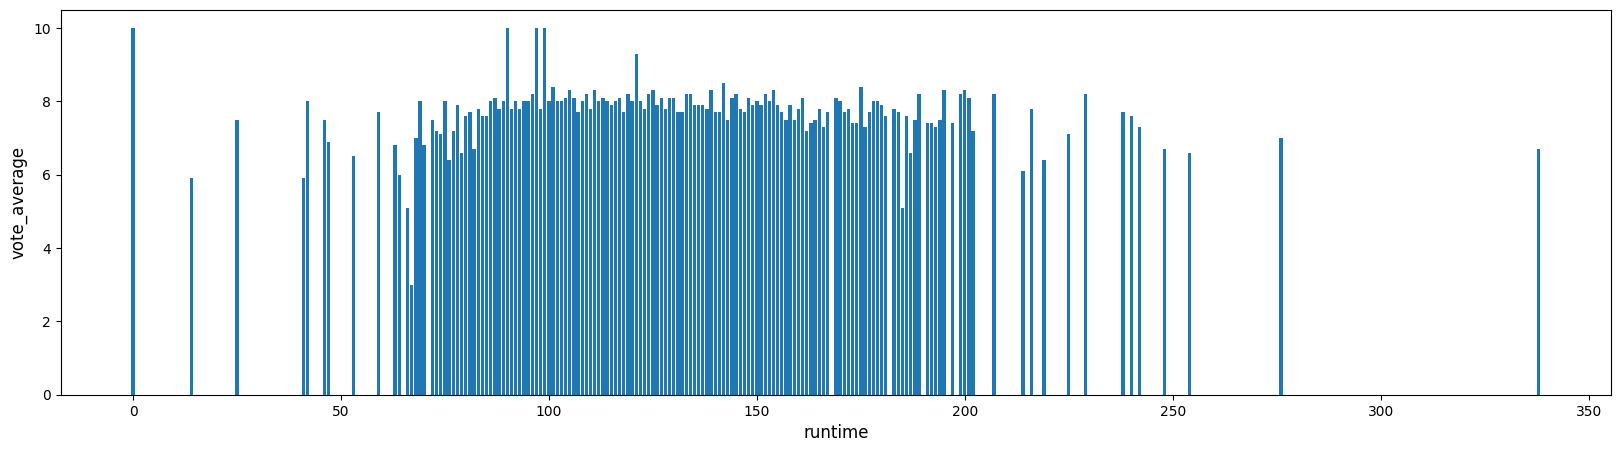

In [ ]:
plt.figure(figsize=(20,5))

x=np.array(df["runtime"])
y=np.array(df["vote_average"])
plt.xlabel("runtime",fontsize=12)
plt.ylabel("vote_average",fontsize=12)

plt.bar(x,y)
plt.show()

### Find the top 5 movies with the highest rate, and find if there anything common between them. ###



In [ ]:

sorted_film=df.sort_values("vote_average", ascending=False)
b=sorted_film.head(5)
b



,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,countries,country_names,companys,companys_names
budget,,,,,,,,,,,,,,,,,,,,,
0,"[{""id"": 35, ""name"": ""Comedy""}]",un konwen url,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,no tags,Little Big Top,10.0,1,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America],"[{'name': 'Fly High Films', 'id': 24248}]",[Fly High Films]
0,"[{""id"": 35, ""name"": ""Comedy""}]",un konwen url,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,no tags,Stiff Upper Lips,10.0,1,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[United Kingdom, India]",[],[]
0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",un konwen url,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,"[{'iso_3166_1': 'US', 'name': 'United States o...",[United States of America],"[{'name': 'HSX Films', 'id': 4714}, {'name': '...","[HSX Films, Chase Productions]"
1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",un konwen url,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],...,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,[],[],[],[]
0,[],un konwen url,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",...,[],Released,no tags,Sardaarji,9.5,2,"[{'iso_3166_1': 'IN', 'name': 'India'}]",[India],[],[]


### Find the most unsuccessful movie along time in terms of revenue - budget ###



In [ ]:
data2 = pd.read_csv("tmdb_5000_movies.csv")
df2=pd.DataFrame(data2)
df2['profit'] = df2['revenue'] - df2['budget']
df2
sortedfilmbyprofit =df2.sort_values("profit",ascending=True)
sortedfilmbyprofit['profit'].head(1)

13   -165710090
Name: profit, dtype: int64

In [16]:
data5 = pd.read_csv("tmdb_5000_movies.csv")
df22 = pd.DataFrame(data5)

### Rearange the dataframe based on vote_average column values ###



In [17]:

byvote=df22.sort_values("vote_average",ascending=False)
vote_avg_col = byvote["vote_average"]
byvote = byvote.drop("vote_average", axis=1)
byvote.insert(0, "vote_avg", vote_avg_col)
byvote

,vote_avg,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_count
4662,10.0,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1/1/2006,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,1
3519,10.0,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",6/12/1998,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,1
4045,10.0,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/1/1998,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",1
4247,10.0,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],7/7/2015,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,2
3992,9.5,0,[],NaN,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",6/26/2015,0,0.0,[],Released,NaN,Sardaarji,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,0.0,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,146882,"[{""id"": 254, ""name"": ""france""}, {""id"": 2071, ""...",fr,Le bonheur d'Elza,A young Parisian woman of Caribbean descent re...,0.007254,"[{""name"": ""France T\u00e9l\u00e9vision"", ""id"":...","[{""iso_3166_1"": ""GP"", ""name"": ""Guadaloupe""}, {...",4/11/2011,0,78.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Elza,0
4400,0.0,0,[],NaN,219716,[],en,Sparkler,Melba is a Californian trailer-park girl who i...,0.547654,[],[],3/19/1999,0,96.0,[],Released,NaN,Sparkler,1
1464,0.0,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/13/2009,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0
4716,0.0,0,[],NaN,38786,[],en,The Blood of My Brother: A Story of Death in Iraq,THE BLOOD OF MY BROTHER goes behind the scenes...,0.005256,[],[],11/25/2005,0,90.0,[],Released,NaN,The Blood of My Brother: A Story of Death in Iraq,0


### Rearange the dataframe based on runtime column values ###



In [23]:
byrun=df22.sort_values("runtime",ascending=False)
runtimecolll = byrun["runtime"]
byrun = byrun.drop("runtime", axis=1)
byrun.insert(0, "runti0me", runtimecolll)
byrun

,runti0me,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,tagline,title,vote_average,vote_count
2384,338.0,18000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,43434,"[{""id"": 1419, ""name"": ""gun""}, {""id"": 7336, ""na...",en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",1.138383,"[{""name"": ""Egoli Tossell Film AG"", ""id"": 2254}...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",5/19/2010,871279,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,The man who hijacked the world,Carlos,6.7,50
2631,276.0,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,112430,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Company,Real-life figures from the Cold War era mix wi...,1.485324,[],[],8/5/2007,0,[],Released,NaN,The Company,7.0,12
1922,254.0,0,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",NaN,10655,"[{""id"": 393, ""name"": ""civil war""}, {""id"": 4097...",en,Gettysburg,Summer 1863. The Confederacy pushes north into...,5.529035,"[{""name"": ""TriStar Television"", ""id"": 8609}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10/8/1993,25000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Gettysburg,6.6,90
1125,248.0,31115000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",NaN,8095,"[{""id"": 5049, ""name"": ""ancient rome""}, {""id"": ...",en,Cleopatra,Historical epic. The triumphs and tragedy of t...,13.244365,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",6/12/1963,71000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The motion picture the world has been waiting ...,Cleopatra,6.7,146
2373,242.0,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10549,"[{""id"": 456, ""name"": ""mother""}, {""id"": 497, ""n...",en,Hamlet,"Hamlet, Prince of Denmark, returns home to fin...",9.814785,"[{""name"": ""Castle Rock Entertainment"", ""id"": 9...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",12/25/1996,0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Hamlet,7.3,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,0.0,0,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,263503,[],en,Water & Power,"Twin brothers nicknamed ""Water"" and ""Power"" fr...",0.350557,[],[],5/2/2014,0,[],Released,NaN,Water & Power,3.0,1
4458,0.0,0,[],NaN,279759,[],en,Harrison Montgomery,Film from Daniel Davila,0.006943,[],[],1/1/2008,0,[],Released,NaN,Harrison Montgomery,0.0,0
4729,0.0,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,272726,[],en,Dude Where's My Dog?,"Left home alone with his dog Harry, young Ray ...",0.283970,[],[],6/12/2014,0,[],Released,NaN,Dude Where's My Dog?,0.0,0
2656,NaN,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",12/3/2015,0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12


### Find the top 5 successful years for the USA cinema based on the total income devided by number of movies  ###



In [21]:
usa = df[df["production_countries"].str.contains("United States of America", na=False)].copy()
usa.loc[:, "year"] = pd.to_datetime(usa["release_date"], errors='coerce').dt.year
top_years = (
    usa.groupby('year')
    .apply(lambda x: x['revenue'].sum() / len(x))
    .sort_values(ascending=False)
    .head(5))
print(top_years)

year
2016    1.603217e+08
1975    1.519088e+08
1939    1.478438e+08
2012    1.398315e+08
1942    1.389548e+08
dtype: float64


C:\Users\youssef\AppData\Local\Temp\ipykernel_3364\1743473579.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['revenue'].sum() / len(x))


### Find the most succesfull movie in [USA, UK] ###



In [23]:
usa_ukcima = df[df["production_countries"].str.contains("United States of America"and"United Kingdom", na=False)]
usa_ukcima.sort_values("popularity",inplace=True,ascending=False)
usa_ukcima.head(1)

C:\Users\youssef\AppData\Local\Temp\ipykernel_3364\657665151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_ukcima.sort_values("popularity",inplace=True,ascending=False)


,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,countries
budget,,,,,,,,,,,,,,,,,,,,
165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso..."


### In your opinion what is the highest variable that affects the revenue value (high coloration) ### PONUS



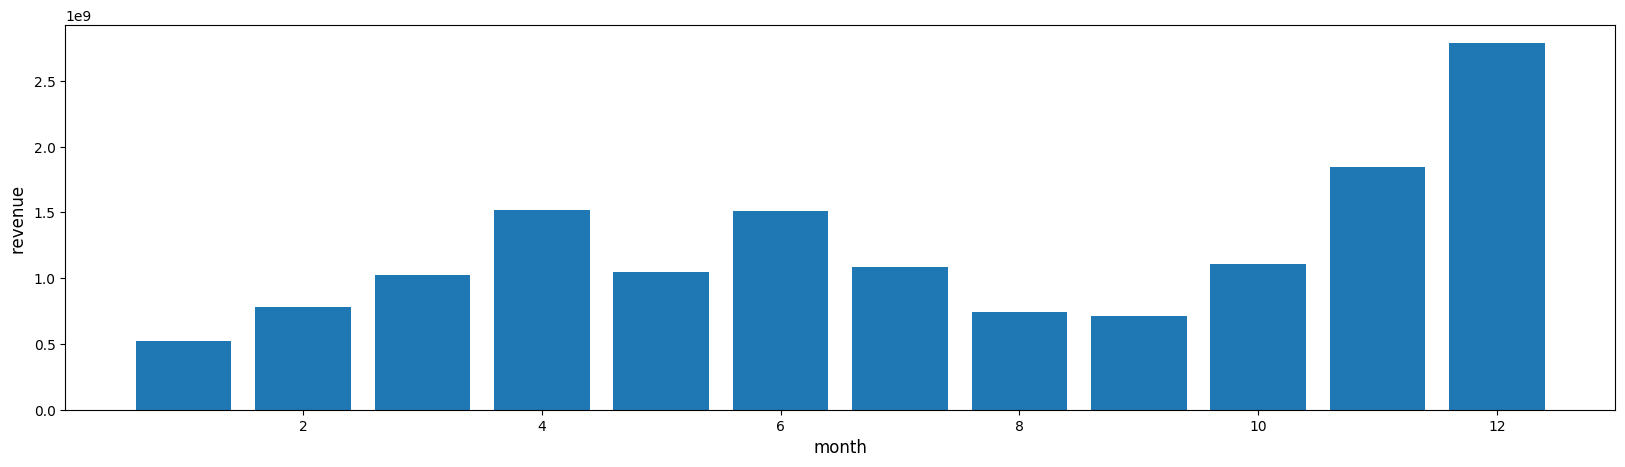

In [26]:
plt.figure(figsize=(20,5))
df["month_release"]=df["release_date"].dt.month
x=np.array(df["years_release"])
y=np.array(df["revenue"])
plt.xlabel("month",fontsize=12)
plt.ylabel("revenue ",fontsize=12)
plt.bar(x,y)
plt.show()


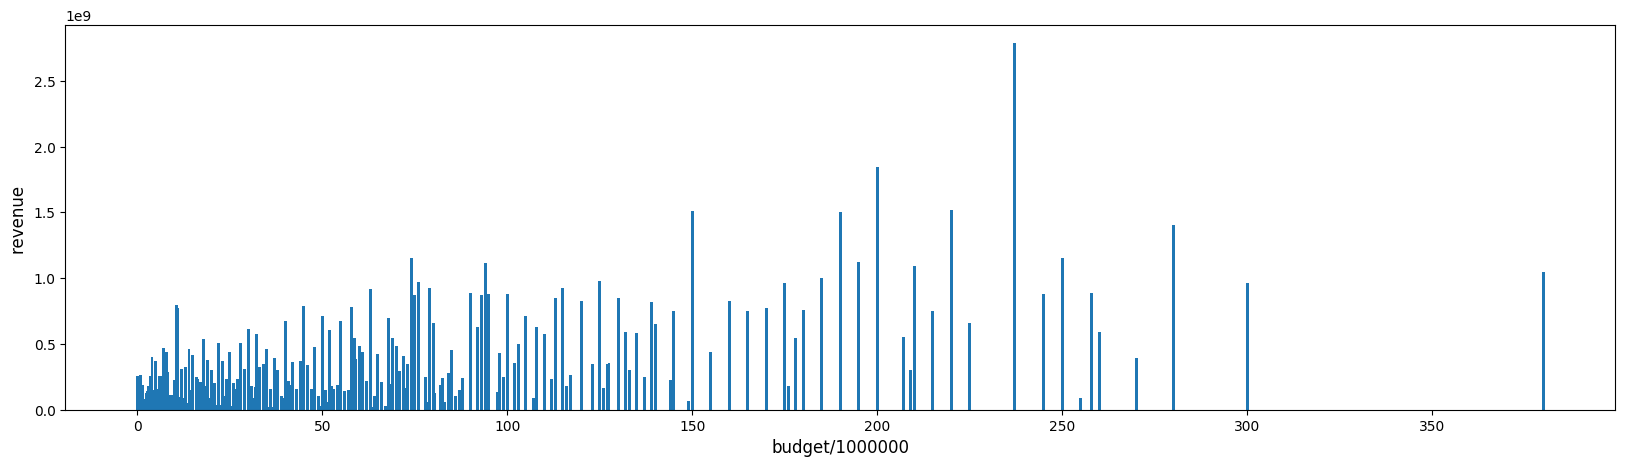

In [27]:
plt.figure(figsize=(20,5))
x2=np.array(df22["budget"]/1000000)
y2=np.array(df22["revenue"])
plt.xlabel("budget/1000000",fontsize=12)
plt.ylabel("revenue ",fontsize=12)
plt.bar(x2,y2)
plt.show()

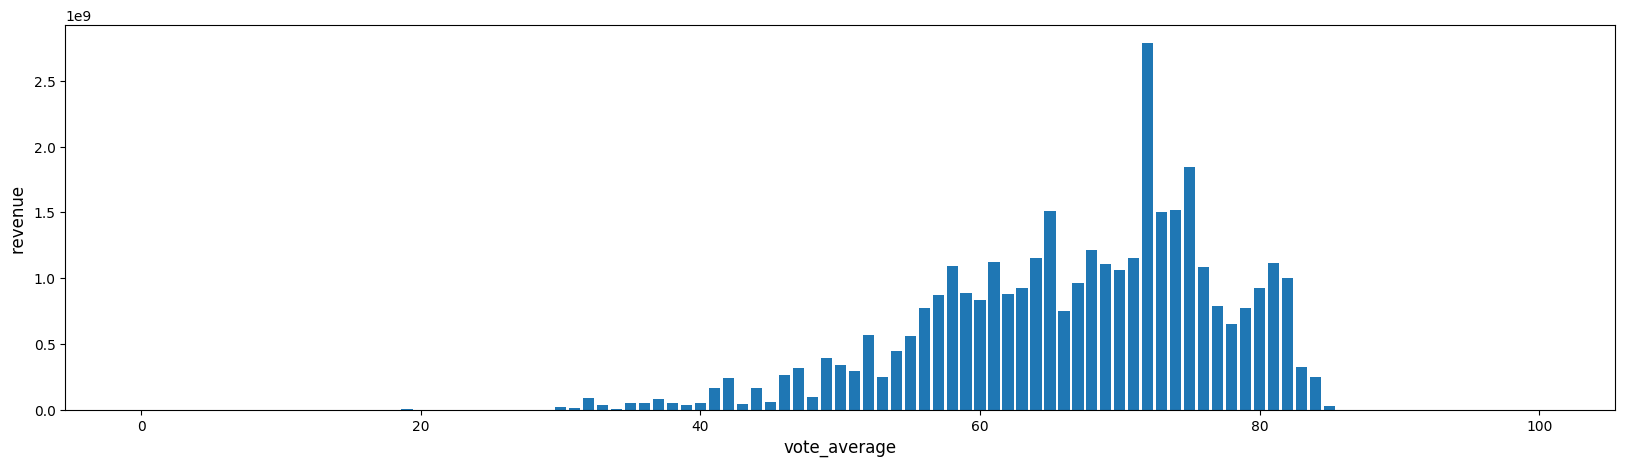

In [ ]:
plt.figure(figsize=(20,5))
x2=np.array(df["vote_average"]*10)
y2=np.array(df["revenue"])
plt.xlabel("vote_average*10",fontsize=12)
plt.ylabel("revenue ",fontsize=12)
plt.bar(x2,y2)
plt.show()

In [ ]:
#I think the most important factor is the month In witch the film was released And the most month is December



## Good Luck